<a href="https://colab.research.google.com/github/Shiva-009/MLproject/blob/master/ml_ymca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#command
"""
Shift + Enter to RUN the Cell
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
def load_dataset():
    train_dataset = h5py.File('/content/gdrive/My Drive/logistic-regression-master/ml-ymca/ml-ymca/datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/gdrive/My Drive/logistic-regression-master/ml-ymca/ml-ymca/datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'catpicture.


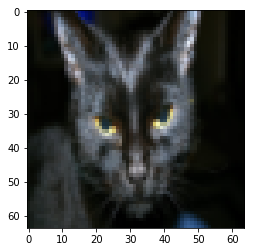

In [4]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "picture.")

In [5]:
### START CODE HERE ### (� 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [6]:
# Reshape the training and test examples
### START CODE HERE ### (� 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
### END CODE HERE ###
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [0]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [0]:
# Write code for sigmoid function
def sigmoid(z):
    #Start writing your code
    s=1/(1+np.exp(-z))
    #End writing your code
    return s

In [0]:
# GRADED FUNCTION: initialize_with_zeros
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [0]:
# GRADED FUNCTION: propagate
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -(np.dot(Y,np.log(A.T))+np.dot(np.log(1-A),(1-Y).T))/m

    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw,
            "db": db}
    return grads, cost

In [0]:
# GRADED FUNCTION: optimize
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent
    , →
    algorithm
    , →
    , →
    , →
    , →
    , →
    , →
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of
    shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and
    bias with respect to the cost function
    costs -- list of all the costs computed during the optimization,
    this will be used to plot the learning curve.
    Tips:
    You basically need to write down two steps and iterate through
    them:
    1) Calculate the cost and the gradient for the current
    parameters. Use propagate().
    2) Update the parameters using gradient descent rule for w and
    b.
    """
    costs = []
    for i in range(num_iterations):
    # Cost and gradient calculation (� 1-4 lines of code)
    ### START CODE HERE ###
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        # update rule (� 2 lines of code)
        ### START CODE HERE ###
        w=w-learning_rate * dw
        b=b-learning_rate *db 
        
        
        
        ### END CODE HERE ###
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
    "b": b}
    grads = {"dw": dw,
    "db": db}
    return params, grads, costs


In [29]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [0]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression
    , →
    parameters (w, b)
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    , →
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions
    (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    # Compute vector "A" predicting the probabilities of a cat being present in the picture

    A = sigmoid(np.dot(w.T,X)+b)

    for i in range(A.shape[1]):
    # Convert probabilities A[0,i] to actual predictions p[0,i]

        if A[0][i]<=0.5:A[0][i]=0
        else: A[0][i]=1
    Y_prediction=A

    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [0]:
# GRADED FUNCTION: model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.05, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape
    (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of
    shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px *
    num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of
    shape (1, m_test)
    num_iterations -- hyperparameter representing the number of
    iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used
    in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    Returns:
    d -- dictionary containing information about the model.
    """
    ### START CODE HERE ###
    # initialize parameters with zeros (� 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])
    # Gradient descent (� 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    # Predict test/train set examples (� 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    ### END CODE HERE ###
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs,
    "Y_prediction_test": Y_prediction_test,
    "Y_prediction_train" : Y_prediction_train,
    "w" : w,
    "b" : b,
    "learning_rate" : learning_rate,
    "num_iterations": num_iterations}
    return d

In [63]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1400, learning_rate = 0.00300, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.528900
Cost after iteration 200: 0.471049
Cost after iteration 300: 0.429731
Cost after iteration 400: 0.397224
Cost after iteration 500: 0.370429
Cost after iteration 600: 0.347699
Cost after iteration 700: 0.328026
Cost after iteration 800: 0.310743
Cost after iteration 900: 0.295380
Cost after iteration 1000: 0.281596
Cost after iteration 1100: 0.269131
Cost after iteration 1200: 0.257785
Cost after iteration 1300: 0.247398
train accuracy: 96.17224880382776 %
test accuracy: 74.0 %


In [0]:
1